<a href="https://colab.research.google.com/github/gimenarippel/proyecto_integrado_2/blob/main/Educaci%C3%B3n_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario en Argentina
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Ciencias Sociales", "Educación Física", "Inglés", "Educación Artística", "Música",
    "Tecnología", "Formación Ética y Ciudadana", "Prácticas del Lenguaje"
]

# Función para generar un nombre y apellido aleatorios
def generar_nombre():
  nombres = ["Juan", "Pedro", "Maria", "Ana", "Jose", "Sofia", "Luis", "Laura", "Diego", "Carolina"]
  apellidos = ["Gomez", "Perez", "Rodriguez", "Lopez", "Gonzalez", "Martinez", "Sanchez", "Romero", "Diaz", "Torres"]
  return f"{random.choice(nombres)} {random.choice(apellidos)}"


# Crear un DataFrame vacío
df = pd.DataFrame(columns=["Apellido y Nombre", "Nro DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

# Generar 100 filas de datos aleatorios
for _ in range(100):
    nombre = generar_nombre()
    dni = np.random.randint(10000000, 99999999)  # DNI aleatorio (ejemplo)
    materia = random.choice(materias)
    nota1 = np.random.randint(1, 11)
    nota2 = np.random.randint(1, 11)
    nota3 = np.random.randint(1, 11)
    faltas = np.random.randint(0, 20)  # Faltas aleatorias (ejemplo)

    nueva_fila = pd.DataFrame({
        "Apellido y Nombre": [nombre],
        "Nro DNI": [dni],
        "Materia Escolar": [materia],
        "Nota 1er Trimestre": [nota1],
        "Nota 2do Trimestre": [nota2],
        "Nota 3er Trimestre": [nota3],
        "Faltas a clases": [faltas]
    })
    df = pd.concat([df, nueva_fila], ignore_index=True)

# Mostrar las primeras filas del DataFrame
print(df.head())

  Apellido y Nombre   Nro DNI              Materia Escolar Nota 1er Trimestre  \
0       Luis Torres  12749970           Ciencias Naturales                  4   
1        Diego Diaz  30259736                   Matemática                  3   
2        Luis Perez  75266711                     Historia                  6   
3        Laura Diaz  62306625       Prácticas del Lenguaje                  6   
4        Ana Romero  36493218  Formación Ética y Ciudadana                 10   

  Nota 2do Trimestre Nota 3er Trimestre Faltas a clases  
0                  8                  1              11  
1                  5                  5               0  
2                  6                  1               7  
3                  6                  7               2  
4                  7                  7               5  


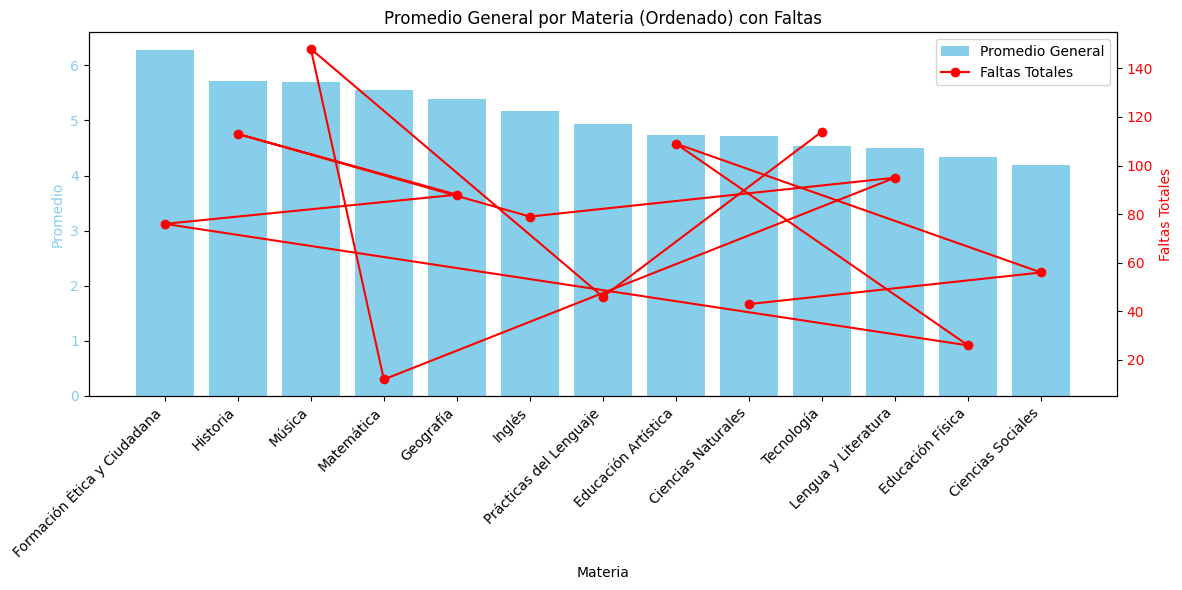

In [ ]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas

import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average grade for each subject
average_grades = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Sort subjects by average grade in descending order
average_grades = average_grades.sort_values(ascending=False)

# Calculate total absences per subject
total_absences = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Create the bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average grades
ax1.bar(average_grades.index, average_grades.values, color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General por Materia (Ordenado) con Faltas')
plt.xticks(rotation=45, ha='right')

# Create a second y-axis for absences
ax2 = ax1.twinx()
ax2.plot(total_absences.index, total_absences.values, color='red', marker='o', label='Faltas Totales')
ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')


plt.tight_layout()
plt.show()